In [2]:
using DifferentialEquations
using Plots

In [3]:
function duffing_harmonic_balance!(du, u, p, t)
    # Unpack parameters
    alpha, beta, delta, gamma, omega = p
    # Unpack variables
    u1, v1 = u
    # Compute determinant D
    D = (4 - delta) * omega^2
    # Compute adjugate elements
    adj11 = -omega^2
    adj12 = -2 * omega
    adj21 = 2 * omega
    adj22 = delta
    # Compute F1 and F2
    F1 = (omega^2 - alpha) * u1 - delta * omega * v1 + gamma - (3 / 4) * beta * (u1^3 + u1 * v1^2)
    F2 = delta * omega * u1 + (omega^2 - alpha) * v1 - (3 / 4) * beta * (v1^3 + u1^2 * v1)
    # Compute derivatives
    du[1] = (adj11 * F1 + adj12 * F2) / D
    du[2] = (adj21 * F1 + adj22 * F2) / D
end

duffing_harmonic_balance! (generic function with 1 method)

In [4]:
# Parameters
alpha = 1.0    # Example value
beta = 0.04    # Example value
delta = 0.1    # Example value
gamma = 1      # Example value

# Range of omega values
omegas = 0.1:0.1:3.0  # Avoid omega = 0 to prevent division by zero

# Arrays to store results
magnitudes = Float64[]

for omega in omegas
    p = [alpha, beta, delta, gamma, omega]
    # Initial guess for u and v
    u0 = [0.1, 0.1]
    # Define the steady-state problem
    prob = SteadyStateProblem(duffing_harmonic_balance!, u0, p)
    # Solve the steady-state problem
    sol = solve(prob)
    # Extract the steady-state solution
    u_ss = sol.u
    # Compute magnitude
    mag = sqrt(u_ss[1]^2 + u_ss[2]^2)
    push!(magnitudes, mag)
end

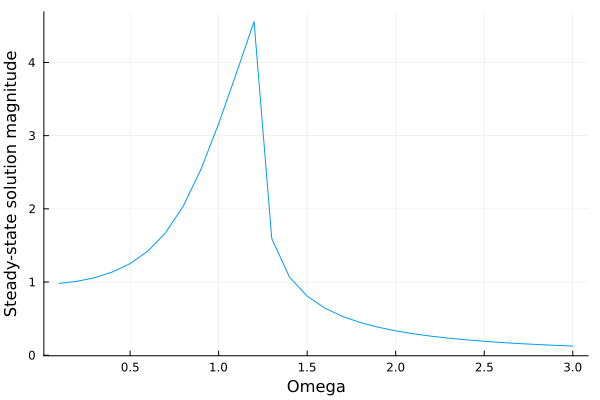

In [5]:
# Plot magnitude vs omega
plot(omegas, magnitudes, xlabel="Omega", ylabel="Steady-state solution magnitude", legend=false)